<a href="https://colab.research.google.com/github/adityasonar13/Deep-Learning-/blob/main/Regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression with Keras


### Step 1 : read the data

In [2]:

import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Target feature here is PE (Power Plant Energy output)

## Step 2 - Perform Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()


AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()



41

In [6]:
df.duplicated().sum()/len(df)


0.004285117056856187

### Step 3: Seperate X and Y(PE)


In [7]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [8]:
X.head()


,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
Y.head()


,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4: Create a Preprocessing Pipeline for X


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:

num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


## Step 5: Apply train test split


In [13]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [14]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [15]:
ytrain.head()


,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [16]:
xtest.head()


,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [17]:
ytest.head()


,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


## Step 5: Build the Keras neural network


In [27]:
xtrain.shape[1]


4

In [29]:

from keras.models import Sequential
from keras.layers import Dense, Input

In [28]:

# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))

In [30]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [33]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)


Epoch 1/100
192/192 [==============================] - 2s 4ms/step - loss: 206730.9375 - mae: 454.3571 - val_loss: 205491.9219 - val_mae: 452.9978
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 204027.9219 - mae: 451.4174 - val_loss: 199428.5000 - val_mae: 446.3654
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 190814.7656 - mae: 436.5861 - val_loss: 176687.3906 - val_mae: 420.0876
Epoch 4/100
192/192 [==============================] - 1s 5ms/step - loss: 155813.0000 - mae: 393.0556 - val_loss: 131950.1250 - val_mae: 359.5763
Epoch 5/100
192/192 [==============================] - 1s 5ms/step - loss: 108052.1953 - mae: 318.8997 - val_loss: 86508.5469 - val_mae: 276.9368
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 69279.7109 - mae: 241.0444 - val_loss: 56762.4453 - val_mae: 213.9240
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 46085.6289 - mae: 190.9195 - val_loss: 38856.2

## Evaluate the model in train and test



In [34]:
model.evaluate(xtrain, ytrain)


240/240 [==============================] - 1s 2ms/step - loss: 21.2839 - mae: 3.6521


[21.283876419067383, 3.652092933654785]

In [35]:
model.evaluate(xtest, ytest)


60/60 [==============================] - 0s 2ms/step - loss: 19.6848 - mae: 3.5308


[19.684810638427734, 3.530773401260376]

## Plot the learning curve


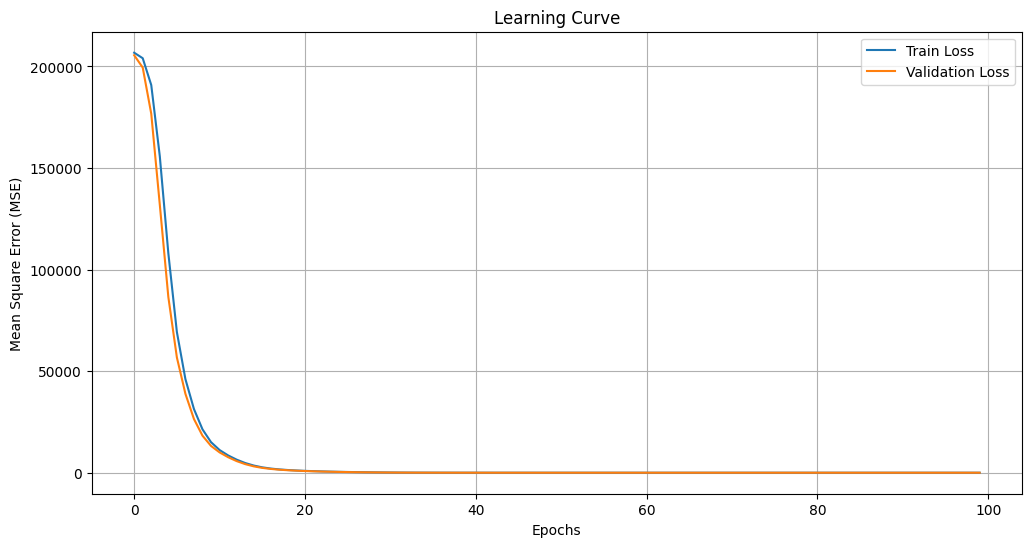

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

## Predict the results for train and test


In [37]:

ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [38]:
ypred_train[0:5]


array([[441.72543],
       [435.1093 ],
       [434.1104 ],
       [427.3789 ],
       [431.94928]], dtype=float32)

In [39]:
ytrain.head()


,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [40]:
ypred_test[0:5]


array([[435.19275],
       [436.89282],
       [461.63733],
       [476.57928],
       [435.52435]], dtype=float32)

In [41]:
ytest.head()


,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


## Perform detailed evaluation


In [42]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [44]:
evaluate_model(model, xtrain, ytrain)


240/240 [==============================] - 1s 2ms/step
Mean Squared Error : 21.28
Root Mean Squared Error : 4.61
Mean Absolute Error : 3.65
R2 Score : 0.9272


In [45]:
evaluate_model(model, xtest, ytest)



60/60 [==============================] - 0s 2ms/step
Mean Squared Error : 19.68
Root Mean Squared Error : 4.44
Mean Absolute Error : 3.53
R2 Score : 0.9312


## R2 score in test is 0.9336 > 0.8 hence above model is very good
##Saving above model (.keras)

In [46]:
model.save('PowerOutput.keras')


## Load the above model


In [47]:
from keras.models import load_model


In [48]:
m = load_model('/content/PowerOutput.keras')


In [49]:
m.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
m.weights


[<tf.Variable 'dense_3/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.13805085, -0.25923505, -0.9793418 , -0.08202083, -0.20397939,
         -0.250427  , -0.09603751,  1.0477538 ],
        [ 1.5660114 , -0.6908896 , -0.6948605 ,  0.7017973 , -0.53526545,
         -0.1265776 , -1.0792078 ,  1.0046043 ],
        [-0.35844484,  0.37939376, -0.16886674,  0.26658705, -0.08046579,
         -0.07552297, -0.05837349,  0.23594709],
        [-0.23294024,  0.08474185, -0.64827895,  0.8704934 ,  0.3899191 ,
          0.58378106, -0.83158743, -0.35822237]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(8,) dtype=float32, numpy=
 array([3.8597138, 3.4249592, 3.1676774, 3.2467847, 3.3411226, 3.2512069,
        2.9606888, 3.9890418], dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 2.6884177 ,  1.3962429 ,  0.07443802,  1.9064592 ],
        [ 1.7713311 ,  1.4006156 , -0.5250284 ,  1.902233  ],
        [ 2.7421415 ,  1.6180149 ,  0.158629